# Weather Data
In this dataset ([source](https://www.kaggle.com/zaraavagyan/weathercsv)) you can find lots of data about temperature, humidity, windspeed, etc. throughout multiple days. If you don't know where to start your with analysis, we will give you some ideas at the end of this template.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

## Load your data

In [2]:
# Load data from the csv file
df = pd.read_csv('weather.csv', index_col=False)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


## Understand your variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
variables

,Variable,Number of unique values,Values
0,MinTemp,180,"[8.0, 14.0, 13.7, 13.3, 7.6, 6.2, 6.1, 8.3, 8...."
1,MaxTemp,187,"[24.3, 26.9, 23.4, 15.5, 16.1, 16.9, 18.2, 17...."
2,Rainfall,47,"[0.0, 3.6, 39.8, 2.8, 0.2, 16.2, 1.2, 0.6, 0.4..."
3,Evaporation,55,"[3.4, 4.4, 5.8, 7.2, 5.6, 4.2, 4.0, 5.4, 6.2, ..."
4,Sunshine,114,"[6.3, 9.7, 3.3, 9.1, 10.6, 8.2, 8.4, 4.6, 4.1,..."
5,WindGustDir,16,"[NW, ENE, SSE, SE, E, S, N, WNW, ESE, NE, NNE,..."
6,WindGustSpeed,35,"[30.0, 39.0, 85.0, 54.0, 50.0, 44.0, 43.0, 41...."
7,WindDir9am,16,"[SW, E, N, WNW, SSE, SE, S, WSW, NNE, NNW, ENE..."
8,WindDir3pm,16,"[NW, W, NNE, ESE, E, ENE, WSW, NE, NNW, SE, S,..."
9,WindSpeed9am,22,"[6.0, 4.0, 30.0, 20.0, 19.0, 11.0, 7.0, 2.0, 1..."


We have to be careful with this dataset; it contains missing values as you can see in this table.

In [4]:
missing_values = df.isnull().sum()
missing_values

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

## Identify what variables are worth analyzing further 
Create a heatmap to identify correlations.

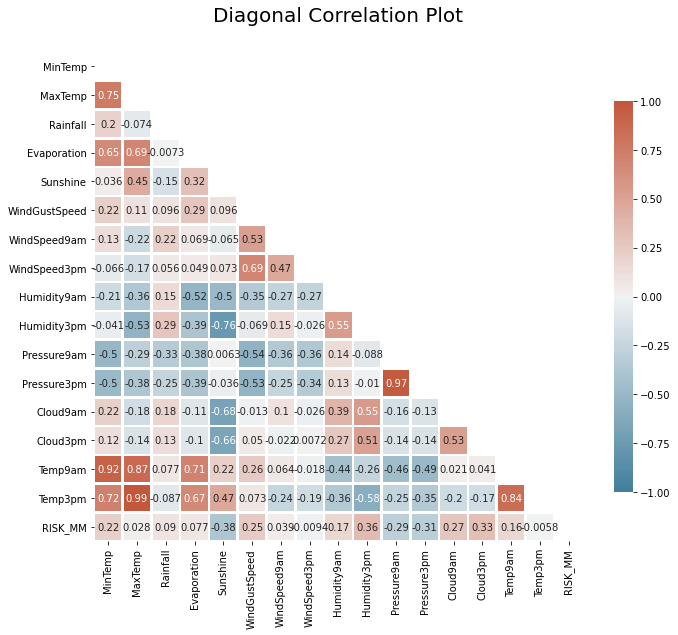

In [5]:
# Generate correlation matrix
corr = df.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))                    # Set figure size

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask 
sns.heatmap(corr, 
            mask = mask, 
            cmap = cmap, 
            vmax = 1,                                      # Set scale min value
            vmin = -1,                                     # Set scale min value
            center = 0,                                    # Set scale min value
            square = True,                                 # Ensure perfect squares
            linewidths = 1.5,                              # Set linewidth between squares
            cbar_kws = {"shrink": .8},                     # Set size of color bar
            annot = True                                   # Include values within squares
           );

plt.xticks(rotation=90)                                    # Rotate x labels
plt.title('Diagonal Correlation Plot', size=20, y=1.05);   # Set plot title and position

## Answer interesting questions: 
Now you get to explore this exciting dataset! Can't think of where to start? Try your hand at these questions:
- Try to predict the maximum temperature of the day given the temperature at 9am.
- How does the direction of the wind at 9am correlate with the direction at 3pm?

In [ ]:
# Start coding 